## Product Recommendation System

### Main Problem: Recommend products to customers based on their past purchases and product categories they tend to buy.

### Data Understanding
#### 1.0. What is the domain area of the dataset?
The Black Friday Sales dataset is a comprehensive collection of sales transaction data from a major retail store during a Black Friday event.

#### 1.1. Under which circumstances was it collected?
It is obtained from a major retail store during a Black Friday event.

#### 2.0. Which data format?
The format of the dataset is *.csv*

#### 2.1. Do the files have headers or another file describing the data?
The files does have headers that describes the data! Each column has a name that describes the data it contains!

#### 2.2. Are the data values separated by commas, semicolon, or tabs?
The data values are separated by commas!  
**Example:**   
User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase  
1000001,P00069042,F,0-17,10,A,2,0,3,,,8370  

#### 3.0 How many features and how many observations does the dataset have?
The dataset has:  
* over 550,000 observations or rows!  
* 12 features or columns!

#### 4.0 Does it contain numerical features? How many?
Yes it has 4 numerical features.

#### 5.0. Does it contain categorical features? How many?
Yes, it has 5 numerical features.

### Features

User ID: Unique ID for each customer.  
Product ID: Unique ID for each product.  
Gender: Gender of the customer, either male or female.  
Age: The age group of the customer, represented in categories (e.g., 18-25, 26-35, etc.).  
Occupation: Occupation category code of the customer.  
City_Category: The category of the city where the customer resides, classified as A, B, or C.  
Stay_In_Current_City_Years: Number of years the customer has lived in the current city.  
Marital_Status: Indicates whether the customer is married (1) or not (0).  
Product_Category 1, 2, 3: Product categories associated with the purchased item.  
Purchase: The amount spent by the customer on the product.  

##  Data Preprocessing

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("datasets/BlackFriday.csv")

In [3]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 12 and the number of observations/rows in the dataset is 537577


### Checking Missing Values

In [6]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [ ]:
dataset['Product_Category_2'].fillna(0, inplace=True)
dataset['Product_Category_3'].fillna(0, inplace=True)

In [8]:
dataset.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Encoding Categorical Variables

In [9]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for Gender
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [10]:
# 2. Map Age to numerical values
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
dataset['Age'] = dataset['Age'].map(age_mapping)

In [11]:
# 3. One-Hot Encoding for Occupation and City_Category
dataset = pd.get_dummies(dataset, columns=['Occupation', 'City_Category'])

# 4. Convert Stay_In_Current_City_Years to numeric
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

In [12]:
dataset.shape

(537577, 34)

## Exploratory Data Analysis

1.  **Which product categories are most frequently purchased?**   
Understanding which products are popular will help you recommend items that are commonly bought by customers.  
Popular products can be good recommendations for new or similar customers.  
The idea is to analyze the subcategories within each product category to find which ones are most frequently purchased.

In [13]:
# Grouping by Product_Category_1 to analyze purchase patterns
category_1_group = dataset.groupby('Product_Category_1')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# Similarly for Product_Category_2 and Product_Category_3
category_2_group = dataset.groupby('Product_Category_2')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
category_3_group = dataset.groupby('Product_Category_3')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View the results
# count: Total purchases in each category.
# mean: Average purchase amount per product category.
# sum: Total money spent in each category.
# There are at least 16 different subcategories in each main category.
print(category_1_group.head())
print(category_2_group.head())
print(category_3_group.head())

   Product_Category_1   count          mean         sum
0                   1  138353  13607.701495  1882666325
1                   2   23499  11255.680752   264497242
2                   3   19849  10096.841705   200412211
3                   4   11567   2328.862886    26937957
4                   5  148592   6238.004045   926917497
   Product_Category_2   count          mean         sum
0                 0.0  166986   7695.854347  1285099934
1                 2.0   48481  13621.740682   660395610
2                 3.0    2835  11229.532628    31835725
3                 4.0   25225  10218.319009   257757097
4                 5.0   25874   9034.054649   233747130
   Product_Category_3   count          mean         sum
0                 0.0  373299   8309.752619  3102022343
1                 3.0     600  13957.166667     8374300
2                 4.0    1840   9778.290761    17992055
3                 5.0   16380  12128.351770   198662402
4                 6.0    4818  13189.812785    6

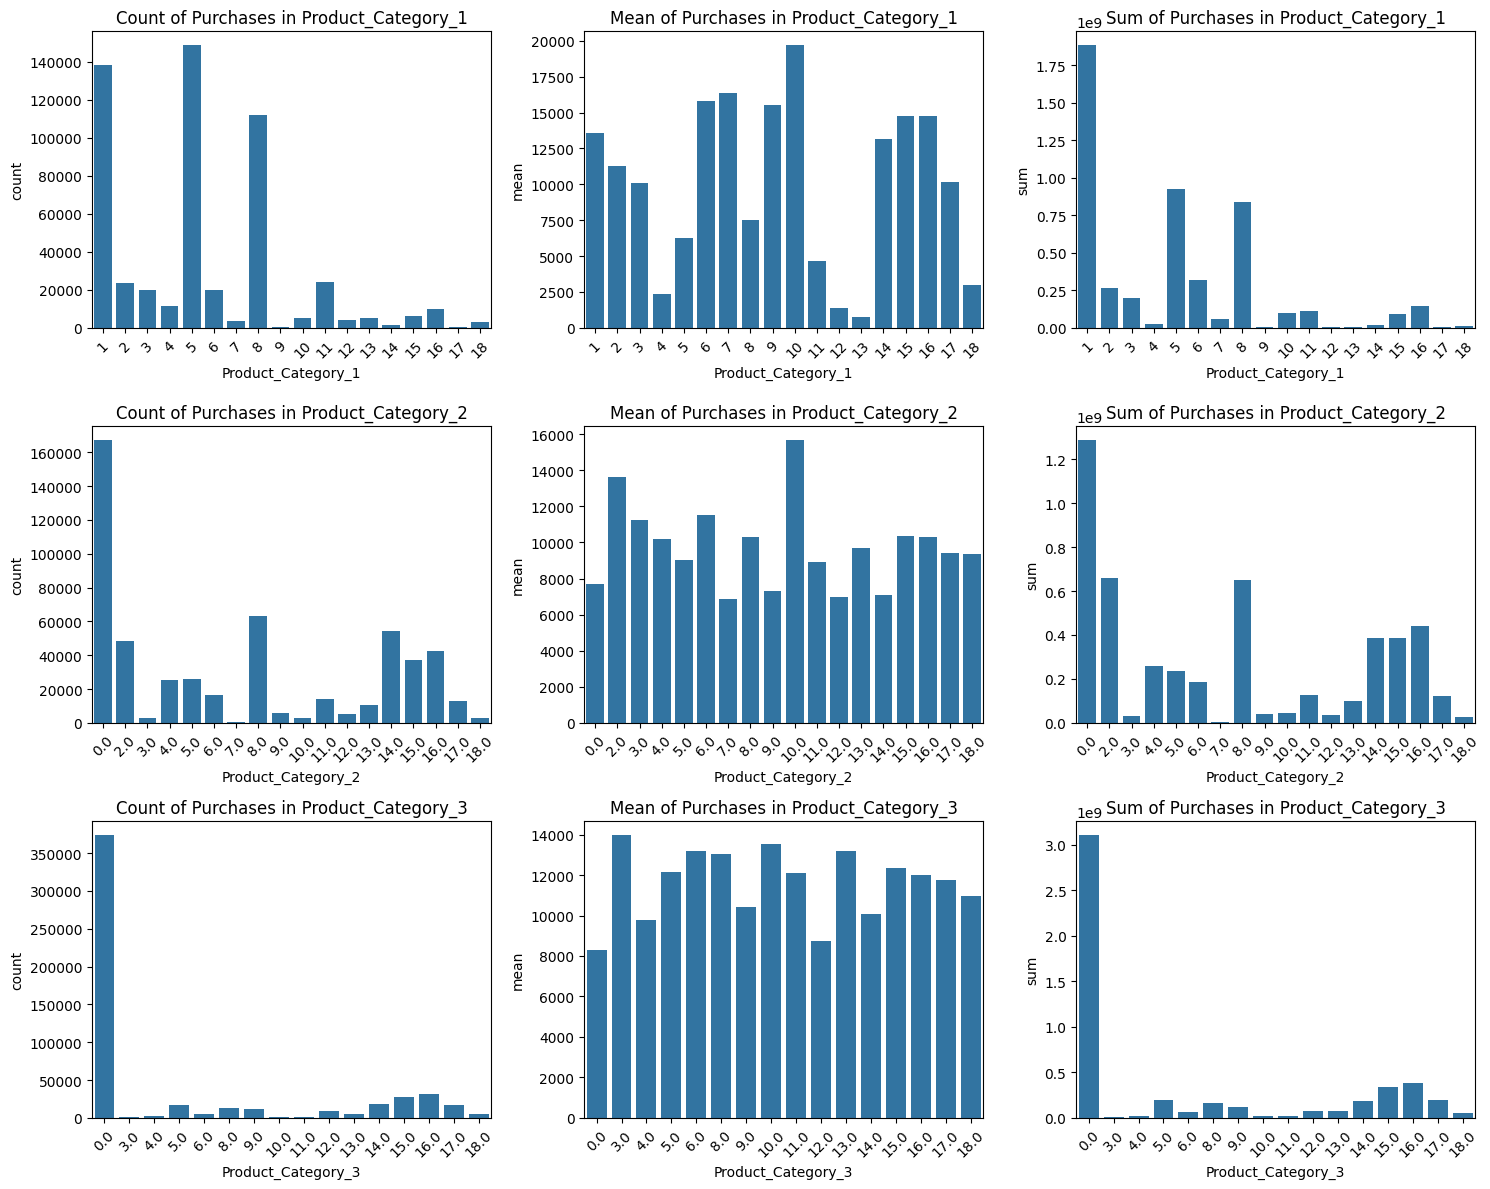

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to hold the grouped data for easy iteration
category_groups = {
    'Product_Category_1': category_1_group,
    'Product_Category_2': category_2_group,
    'Product_Category_3': category_3_group
}

# Aggregation functions to plot
aggregation_functions = ['count', 'mean', 'sum']

# Set up the figure size for multiple plots
plt.figure(figsize=(15, 12))

# Loop through each product category and each aggregation function
for i, (category, data) in enumerate(category_groups.items()):
    for j, agg_func in enumerate(aggregation_functions):
        plt.subplot(3, 3, i*3 + j + 1)  # Create a grid of 3x3 subplots
        sns.barplot(x=category, y=agg_func, data=data)
        plt.title(f'{agg_func.capitalize()} of Purchases in {category}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

2. **What are the purchase patterns across different age groups and gender?**  
Different customer demographics may prefer certain products.  
Identifying trends based on **age** or **gender** helps tailor recommendations to individual customer profiles.


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Gender and Product_Category_1
gender_category_group1 = dataset.groupby(['Gender', 'Product_Category_1'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
gender_category_group2 = dataset.groupby(['Gender', 'Product_Category_2'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
gender_category_group3 = dataset.groupby(['Gender', 'Product_Category_3'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

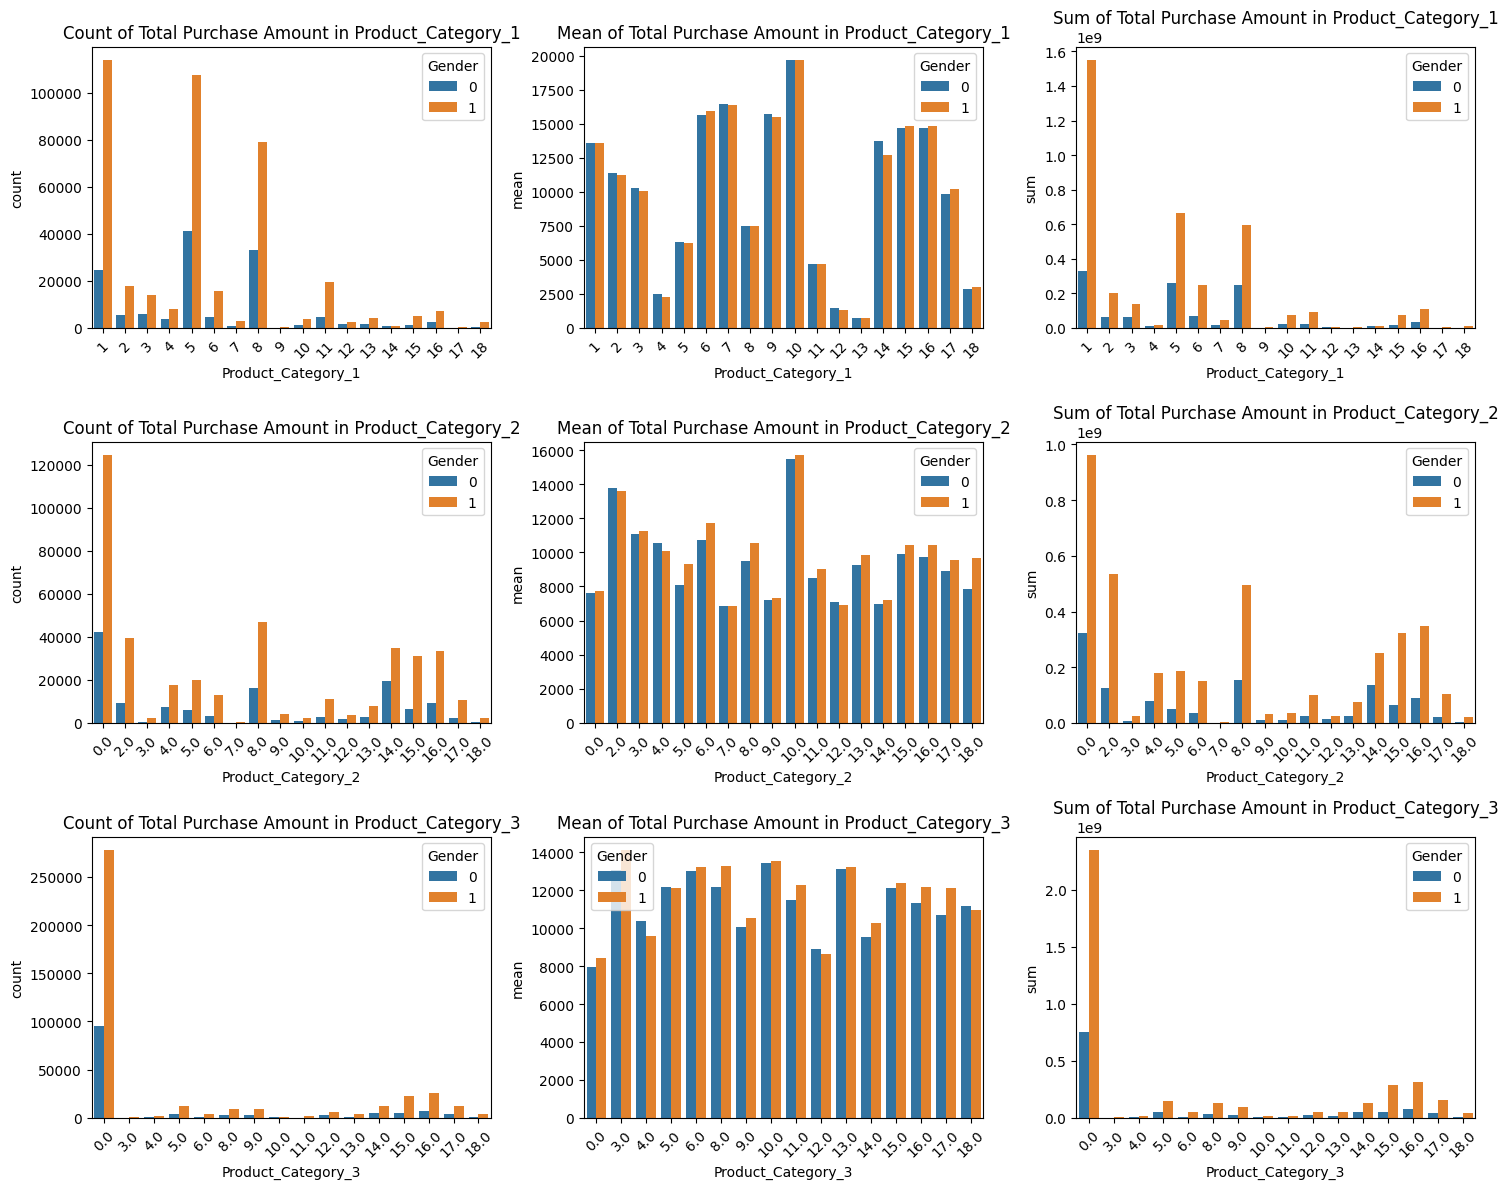

In [30]:
# Dictionary to hold the grouped data for easy iteration
gender_category_groups = {
    'Product_Category_1': gender_category_group1,
    'Product_Category_2': gender_category_group2,
    'Product_Category_3': gender_category_group3
}

# Aggregation functions to plot
aggregation_functions = ['count', 'mean', 'sum']

# Set up the figure size for multiple plots
plt.figure(figsize=(15, 12))

# Loop through each product category and each aggregation function
for i, (category, data) in enumerate(gender_category_groups.items()):
    for j, agg_func in enumerate(aggregation_functions):
        plt.subplot(3, 3, i*3 + j + 1)  # Create a grid of 3x3 subplots
        sns.barplot(x=category, y=agg_func, hue='Gender', data=data)
        plt.title(f'{agg_func.capitalize()} of Total Purchase Amount in {category}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

   Gender  Product_Category_2  count          mean        sum
0       0                 0.0  42347   7614.732519  322461078
1       0                 2.0   9039  13747.387654  124262637
2       0                 3.0    611  11088.430442    6775031
3       0                 4.0   7451  10524.277144   78416389
4       0                 5.0   6062   8061.557242   48869160


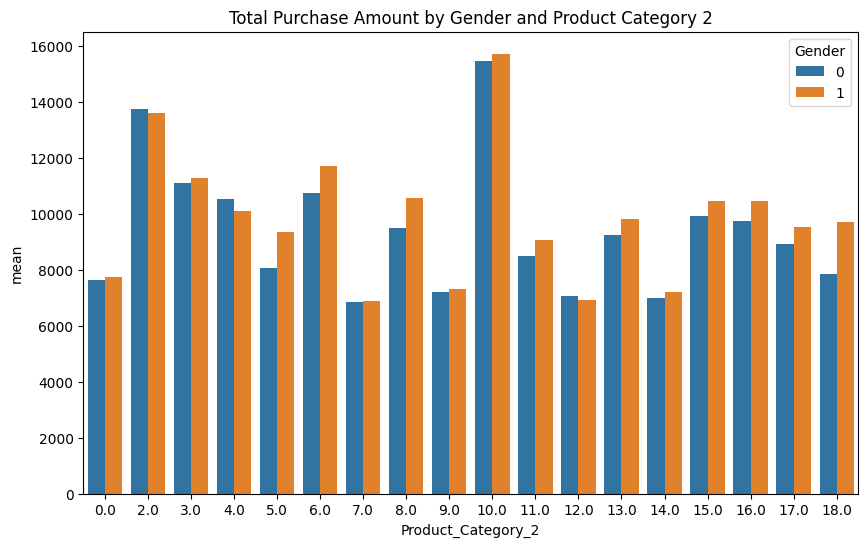

In [16]:
# Group by Gender and Product_Category_1
gender_category_group2 = dataset.groupby(['Gender', 'Product_Category_2'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View results
print(gender_category_group2.head())

# Visualize the patterns
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_2', y='mean', hue='Gender', data=gender_category_group2)
plt.title('Total Purchase Amount by Gender and Product Category 2')
plt.show()

   Gender  Product_Category_3  count          mean        sum
0       0                 0.0  95265   7925.830536  755054246
1       0                 3.0     94  13067.755319    1228369
2       0                 4.0    428  10381.656542    4443349
3       0                 5.0   4215  12162.033689   51262972
4       0                 6.0    816  13007.083333   10613780


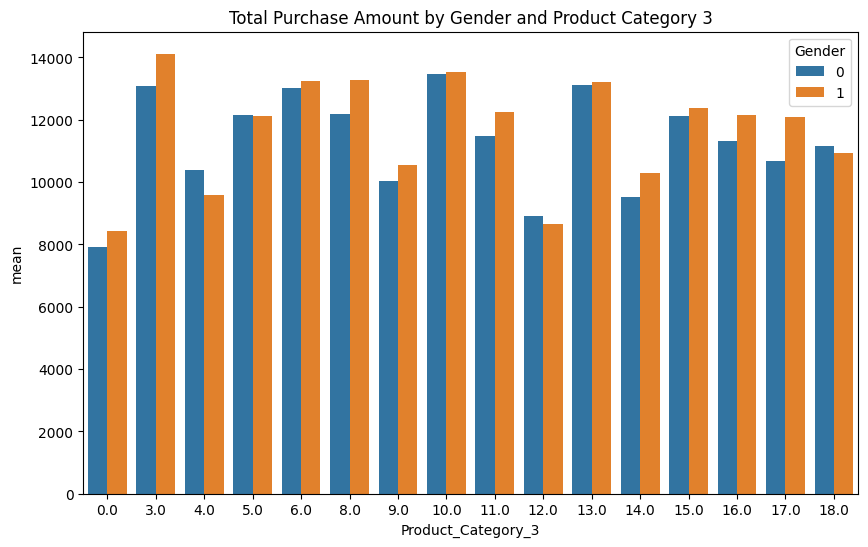

In [17]:
# Group by Gender and Product_Category_3
gender_category_group3 = dataset.groupby(['Gender', 'Product_Category_3'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View results
print(gender_category_group3.head())

# Visualize the patterns
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_3', y='mean', hue='Gender', data=gender_category_group3)
plt.title('Total Purchase Amount by Gender and Product Category 3')
plt.show()

3. Segment customers based on features like Age, Gender, or City_Category, and analyze how these groups tend to spend.

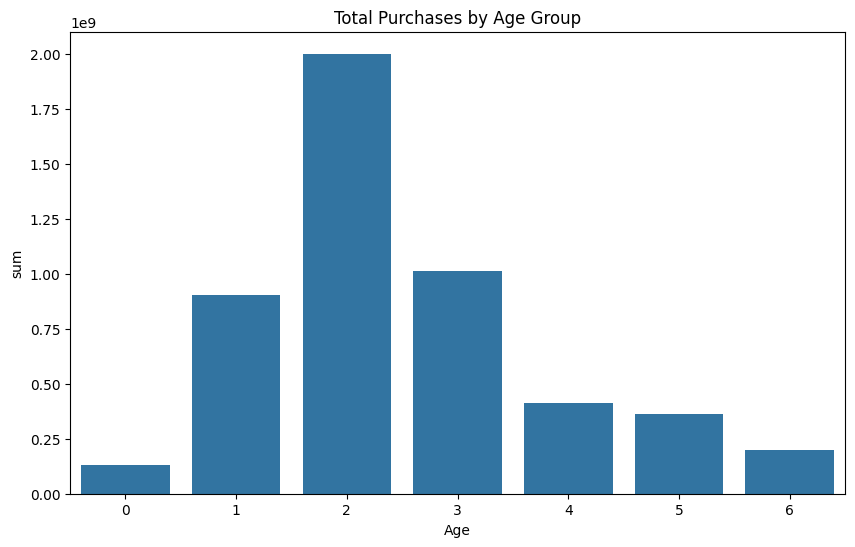

In [18]:
# Group by Age and analyze product purchases
age_purchase_group = dataset.groupby('Age')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
# '0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='sum', data=age_purchase_group)
plt.title('Total Purchases by Age Group')
plt.show()

   Gender   count         mean         sum
0       0  132197  8809.761349  1164624021
1       1  405380  9504.771713  3853044357


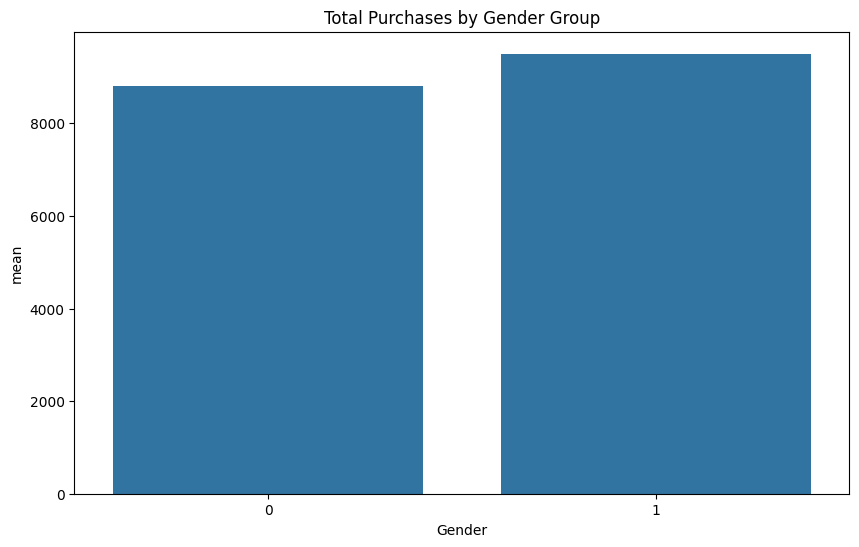

In [19]:
# Group by Age and analyze product purchases
gender_purchase_group = dataset.groupby('Gender')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

print(gender_purchase_group)

# F = 0
# M = 1

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='mean', data=gender_purchase_group)
plt.title('Total Purchases by Gender Group')
plt.show()